# MATH 210 Introduction to Mathematical Computing

## January 27, 2017

1. Modules and Packages
2. An overview of scientific computing in Python
3. Exercises


## 1. Modules and Packages

Notice that we have been using the standard Python library consisteing of the built-in functions (like `sum`, `len`, `round`, etc) and built-in datatypes (like `int`, `float`, etc). But what if we want to do more like work with matricies and exponential functions and tig functions? Python packages NumPy, SciPy, matplotlib, pandas and many more have been built for scientific computing. 

What is a package or a module? Simply a module is a collection of functions and other things saved to a `.py` file (just a text file with Pythin code). A package is a whole collection of modules. Let's make our own module!

Let's gather together all of our number theory functions:

In [1]:
def factorial(N):
    """Compute N factorial N!=N(N-1) ... (2)(1)"""
    # Initialize the output variable to 1
    product = 1
    for n in range(2,N+1):
        # Update the output variable
        product = product * n
    return product

In [2]:
def n_choose_k(N,K):
    """Compute N choose K"""
    return factorial(N)//(factorial(N-K) * factorial(K))

In [3]:
def divisors_2(N):
    """Return the list of divisors of N."""
    #Initialize the list of divisors
    divisor_list = [1]
    # Check division by d for d <= N/2
    for d in range(2,N// 2 + 1):
        if N % d == 0:
            divisor_list.append(d)
    divisor_list.append(N)
    return divisor_list

In [8]:
def rep_of_squares(N):
    """Find all representations of N as a sum of squares a**2 + b**2 = N"""
    reps = []
    stop = int((N/2)**0.5) + 1 # a must be less than \sqrt(N/2)
    for a in range(1,stop):
        b_squared = N - a**2
        if is_square(b_squared):
            b = round((b_squared)**(0.5))
            reps.append([a,b])
    return reps

In [9]:
def is_square(N):
    """Determine if N is square."""
    return N == round(N**(0.5))**2

In [27]:
rep_of_squares(100)

[[6, 8.0]]

In [14]:
is_square(100)

True

In [15]:
is_square(3)

False

In [5]:
def collatz(a):
    """Compute the Collatz sequence starting at a."""
    # Initialize the sequence with the first value a.
    x_list = [a]
    # Continue computing values in the sequence until we reach 1.
    while x_list[-1] != 1:
        # Check if the last element in the list is even
        if x_list[-1] % 2 == 0:
            # Compute and append the new values
            x_list.append(x_list[-1] // 2)
        else:
            # Compute and append the new list
            x_list.append(3*x_list[-1] + 1)
        print(x_list)
    return x_list

In [6]:
def is_prime(N):
    "Determine whether or not N is a prime number."
    
    if N <= 1:
        return False
    # N is prime of N is only divisble by 1 and itself
    # We should test whether N is divisible by d for all 1 < d < N
    for d in range(2,N):
        # Check if N is divisible by d
        if N % d == 0:
            return False
        # If we exit the for loop, then N is not divisible by any d and N is prime
    return True

In [1]:
import number_theory

Now all the funtions in the file `number_theory.py` are available to us! We use the dot notation to access them by name!

In [3]:
number_theory.is_prime(2017)

True

In [2]:
number_theory.rep_of_squares(2017)

[[9, 44]]

In [6]:
number_theory.is_square(9)

True

In [3]:
number_theory.rep_of_squares(20000)

[[20, 140], [68, 124], [100, 100]]

Let's answer some questions using our number theory module!

1. What is the smallest integer that can be expressed as a sum of squares in 5 ways?
2. What is the smallest prime number that can be expressed as a sum of squares in 3 ways?

In [8]:
for N in range (1,2000):
    reps = number_theory.rep_of_squares(N)
    if len(reps) > 3:
        print(N, '-', reps)

1105 - [[4, 33], [9, 32], [12, 31], [23, 24]]
1625 - [[5, 40], [16, 37], [20, 35], [28, 29]]
1885 - [[6, 43], [11, 42], [21, 38], [27, 34]]


In [10]:
for N in range (8000,8500):
    reps = number_theory.rep_of_squares(N)
    if len(reps) > 3:
        print(N, '-', reps)

8125 - [[5, 90], [27, 86], [30, 85], [50, 75], [58, 69]]
8177 - [[16, 89], [44, 79], [49, 76], [56, 71]]
8245 - [[18, 89], [26, 87], [39, 82], [54, 73]]
8450 - [[13, 91], [23, 89], [35, 85], [47, 79], [65, 65]]


## 2. Overview of NumPy and Matplotlib

NumPy is the core scientific computing package. We use it to create arrays and to array operations. Matplotlib is the plotting library that depends on NumPy. [Documentaion](https://docs.scipy.org/doc/numpy/user/basics.types.html)

In [3]:
import numpy as np

In [16]:
x = np.linspace(0,1,100)

In [17]:
print(x)

[ 0.          0.01010101  0.02020202  0.03030303  0.04040404  0.05050505
  0.06060606  0.07070707  0.08080808  0.09090909  0.1010101   0.11111111
  0.12121212  0.13131313  0.14141414  0.15151515  0.16161616  0.17171717
  0.18181818  0.19191919  0.2020202   0.21212121  0.22222222  0.23232323
  0.24242424  0.25252525  0.26262626  0.27272727  0.28282828  0.29292929
  0.3030303   0.31313131  0.32323232  0.33333333  0.34343434  0.35353535
  0.36363636  0.37373737  0.38383838  0.39393939  0.4040404   0.41414141
  0.42424242  0.43434343  0.44444444  0.45454545  0.46464646  0.47474747
  0.48484848  0.49494949  0.50505051  0.51515152  0.52525253  0.53535354
  0.54545455  0.55555556  0.56565657  0.57575758  0.58585859  0.5959596
  0.60606061  0.61616162  0.62626263  0.63636364  0.64646465  0.65656566
  0.66666667  0.67676768  0.68686869  0.6969697   0.70707071  0.71717172
  0.72727273  0.73737374  0.74747475  0.75757576  0.76767677  0.77777778
  0.78787879  0.7979798   0.80808081  0.81818182  0.

In [18]:
y = np.cos(x)


In [19]:
print(y)

[ 1.          0.99994899  0.99979595  0.9995409   0.99918387  0.99872489
  0.99816401  0.9975013   0.9967368   0.99587061  0.99490282  0.99383351
  0.9926628   0.99139081  0.99001767  0.98854352  0.98696851  0.9852928
  0.98351656  0.98163997  0.97966323  0.97758653  0.97541009  0.97313412
  0.97075887  0.96828458  0.96571149  0.96303986  0.96026998  0.95740213
  0.95443659  0.95137367  0.94821368  0.94495695  0.9416038   0.93815458
  0.93460964  0.93096935  0.92723406  0.92340418  0.91948007  0.91546216
  0.91135084  0.90714653  0.90284967  0.89846069  0.89398004  0.88940818
  0.88474558  0.8799927   0.87515004  0.87021809  0.86519735  0.86008833
  0.85489156  0.84960756  0.84423688  0.83878007  0.83323767  0.82761026
  0.8218984   0.81610269  0.81022371  0.80426207  0.79821837  0.79209322
  0.78588726  0.77960112  0.77323543  0.76679085  0.76026803  0.75366765
  0.74699036  0.74023687  0.73340784  0.72650399  0.71952601  0.71247462
  0.70535054  0.69815449  0.69088721  0.68354943  0.

In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

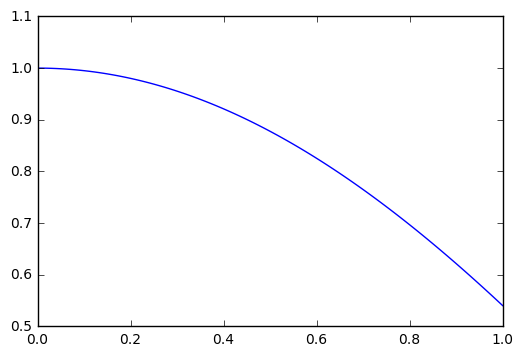

In [22]:
plt.plot(x,y)

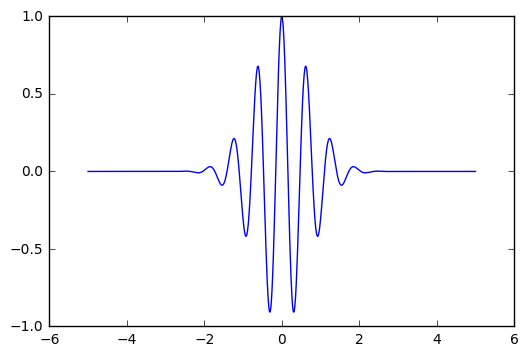

In [23]:
x = np.linspace(-5,5,1000)
y = np.exp(-x**2)* np.cos(10*x)
plt.plot(x,y)

### Exercises
1.

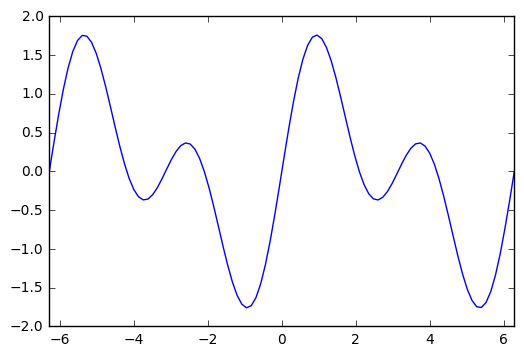

In [7]:
x = np.linspace(-2*np.pi,2*np.pi,100)
y = np.sin(x) + np.sin(2*x)
plt.plot(x,y), plt.xlim(-2*np.pi,2*np.pi);

2.

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


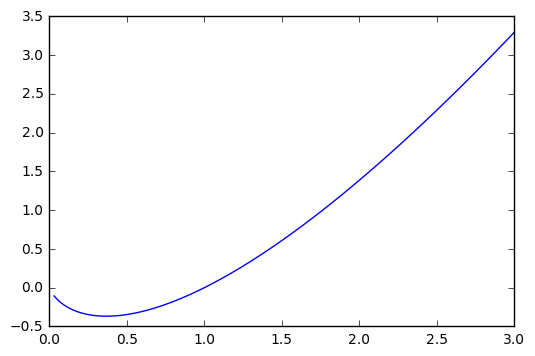

In [11]:
x = np.linspace(0,3,100)
y = x*np.log(x)
plt.plot(x,y);

3.

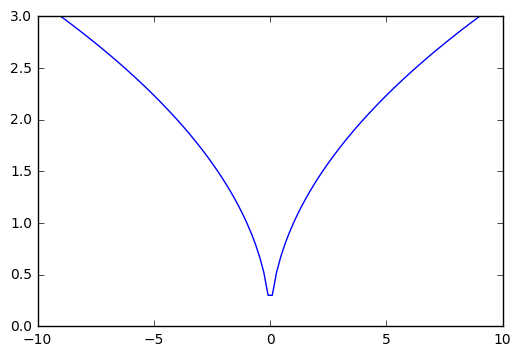

In [13]:
x = np.linspace(-9,9,100)
y = (np.absolute(x))**0.5
plt.plot(x,y);

4. 

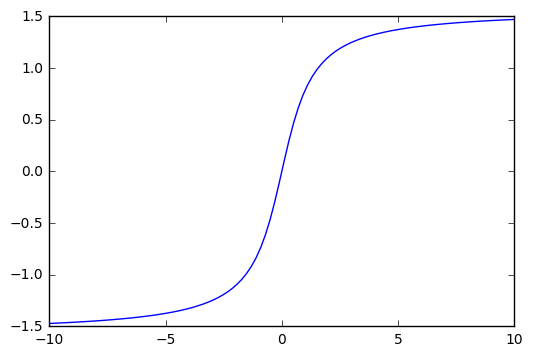

In [17]:
x = np.linspace(-10,10,100)
y = np.arctan(x)
plt.plot(x,y);